In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno
import pandas as pd

fitbitHypnoDF = getWorkingHypnoDfParquet("fitbit")
fitbitHypnoDF['startDate'] = fitbitHypnoDF.index
fitbitHypnoDF

,endDate,value,startDate
startDate,,,
2020-05-13 13:43:00-07:00,2020-05-13 13:45:00-07:00,1,2020-05-13 13:43:00-07:00
2020-05-13 13:45:00-07:00,2020-05-13 14:41:00-07:00,2,2020-05-13 13:45:00-07:00
2020-05-13 14:41:00-07:00,2020-05-13 14:42:00-07:00,1,2020-05-13 14:41:00-07:00
2020-05-13 14:42:00-07:00,2020-05-13 14:43:00-07:00,2,2020-05-13 14:42:00-07:00
2020-05-13 14:43:00-07:00,2020-05-14 01:21:00-07:00,-1,2020-05-13 14:43:00-07:00
...,...,...,...
2024-08-27 12:20:30-07:00,2024-08-27 12:28:30-07:00,2,2024-08-27 12:20:30-07:00
2024-08-27 12:28:30-07:00,2024-08-27 12:40:30-07:00,1,2024-08-27 12:28:30-07:00
2024-08-27 12:40:30-07:00,2024-08-27 12:46:30-07:00,2,2024-08-27 12:40:30-07:00


In [12]:
len(set(fitbitHypnoDF.index.date))

1472

c:\Users\abhik\Documents\GitHub\dataImport\utils.py:46: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  hypnoDF.groupby('ConsecutiveGroup').endDate.agg(max),
c:\Users\abhik\Documents\GitHub\dataImport\utils.py:55: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  hypnoDF.groupby('ConsecutiveGroup').startDate.agg(min),


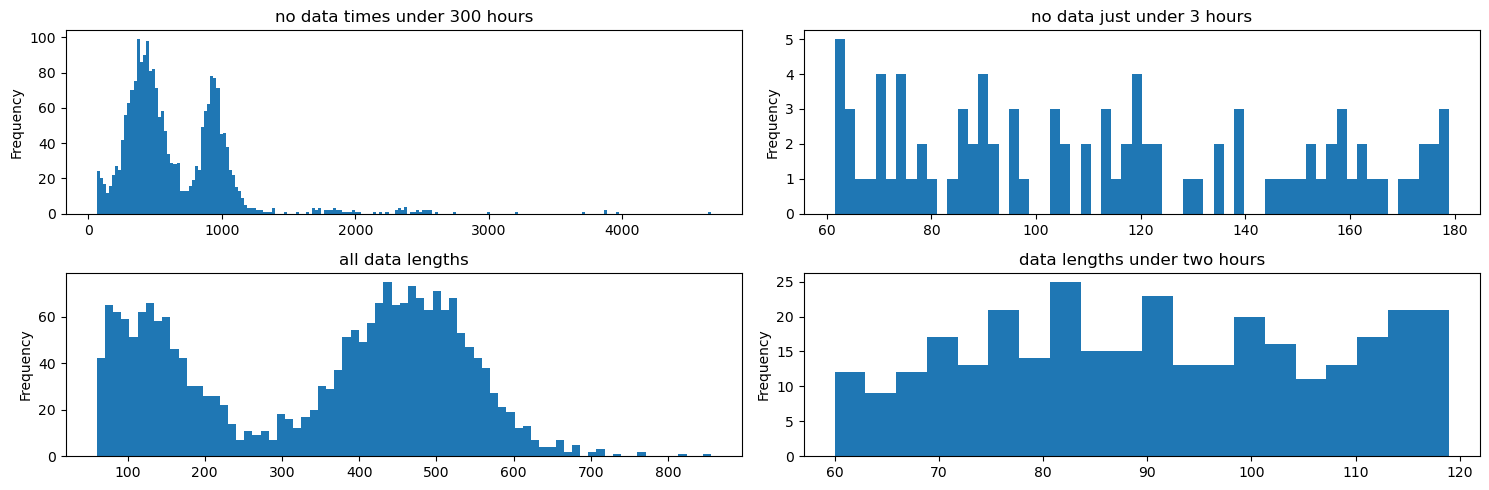

In [11]:
groupedByNoData = regroupHypno(fitbitHypnoDF, [-1])
noDataTimes = groupedByNoData[groupedByNoData['value'] == 1]
dataTimes = groupedByNoData[groupedByNoData['value'] == 0]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

noDataTimes[noDataTimes['durationInMin'] < 5000].durationInMin.plot.hist(bins=200, ax=axs[0,0])
axs[0,0].set_title("no data times under 84 hours")

noDataTimes[noDataTimes['durationInMin'] < 180].durationInMin.plot.hist(bins=60, ax=axs[0,1])
axs[0,1].set_title('no data just under 3 hours')

dataTimes[dataTimes['durationInMin'] < 10000].durationInMin.plot.hist(bins=75, ax=axs[1,0])
axs[1,0].set_title('all data lengths')

dataTimes[dataTimes['durationInMin'] < 120].durationInMin.plot.hist(bins=20, ax=axs[1,1])
axs[1,1].set_title('data lengths under two hours')

plt.tight_layout()
plt.show()

In [3]:
groupedByAsleep = regroupHypno(fitbitHypnoDF, [1,2,3])
awakeOrNoDataTimes = groupedByAsleep[groupedByAsleep['value'] == 0]
sleepTimes = groupedByAsleep[groupedByAsleep['value'] == 1]

c:\Users\abhik\Documents\GitHub\dataImport\utils.py:46: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  hypnoDF.groupby('ConsecutiveGroup').endDate.agg(max),
c:\Users\abhik\Documents\GitHub\dataImport\utils.py:55: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  hypnoDF.groupby('ConsecutiveGroup').startDate.agg(min),


<Axes: xlabel='durationInMin'>

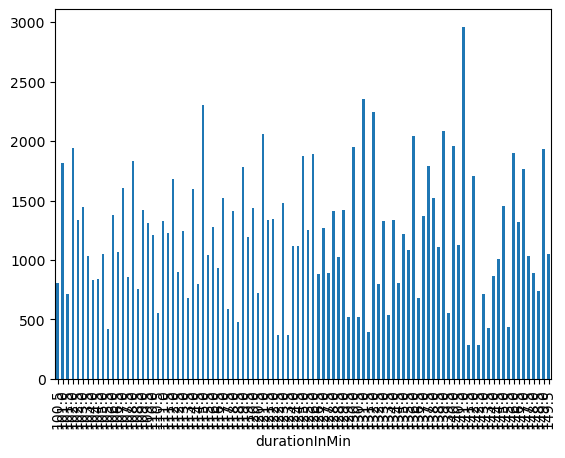

In [4]:
overallDurationList = (sleepTimes.durationInMin.value_counts().index *
                       sleepTimes.durationInMin.value_counts().values
                       ).to_list()
sleepTimesOverallDurations = pd.Series(index=sleepTimes.durationInMin.value_counts().index, 
                                       data=overallDurationList)

sleepTimesOverallDurations = sleepTimesOverallDurations.sort_index()

sleepTimesOverallDurations[(100 < sleepTimesOverallDurations.index) &
                           (sleepTimesOverallDurations.index < 150)].plot.bar()

<Axes: xlabel='durationInMin'>

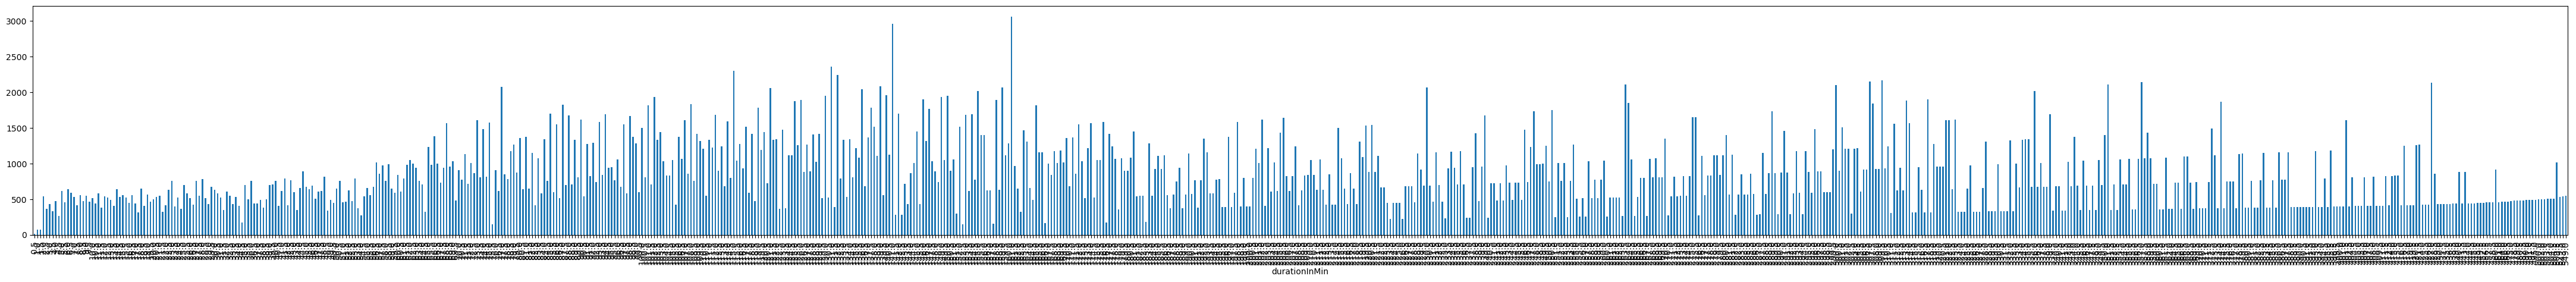

In [5]:
sleepTimesOverallDurations.plot.bar(figsize=(55, 5))

<Axes: ylabel='Frequency'>

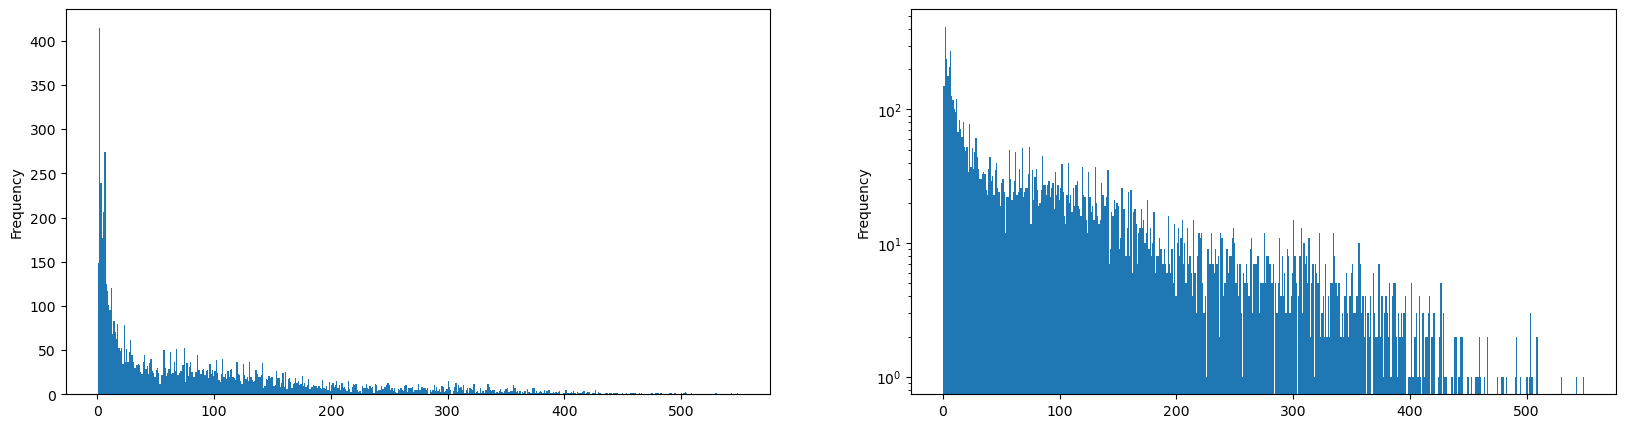

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sleepTimes.durationInMin.plot.hist(bins=500, ax=axs[0])
sleepTimes.durationInMin.plot.hist(bins=500, log=True, ax=axs[1])